## 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')
submission  = pd.read_csv('submission.csv')

## 2. 데이터 분석

In [2]:
train.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [3]:
test.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


**속성**
- id : 선수 고유의 아이디
- name : 이름
- age : 나이
- continent : 선수들의 국적이 포함되어 있는 대륙입니다
- contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
- position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
- prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
- reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
- stat_overall : 선수의 현재 능력치 입니다.
- stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
- stat_skill_moves : 선수의 개인기 능력치 입니다.
- value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

In [4]:
# 데이터 프레임을 복사
train_df = train.copy()
train_df.head(2)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0


In [5]:
# X, y 분리
train_X = train_df.iloc[:, :-1]
train_X.head(2)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0


In [6]:
train_y = train_df.iloc[:, -1].reset_index()
train_y = train_y.drop('index', axis=1)
train_y.head(2)

,value
0,110500000.0
1,72000000.0


## 3. 데이터 전처리

#### 1) 불필요 속성 제거

In [7]:
# id, name 제거
train_X = train_X.drop(['id', 'name'], axis = 1)
test = test.drop(['id', 'name'], axis = 1)

#### 2) contract_until : 년도만 추출 및 수치형으로 변환

In [8]:
#contract_until 변수 int 형으로 변환
# 계약 연도만 추출
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:]
    return int(string)

In [9]:
train_X['contract_until'] = train_X['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

#### 3) 범주형 데이터 변환
- 3개 이상 범주를 가진 데이터 : 원핫인코딩
- 2개의 범주 : 라벨인코딩

In [10]:
from sklearn.preprocessing import LabelEncoder
train_X = pd.get_dummies(train_X, columns=['continent', 'contract_until', 'position'])
train_X['prefer_foot'] = LabelEncoder().fit_transform(train_X['prefer_foot'])
test = pd.get_dummies(test, columns=['continent', 'contract_until', 'position'])
test['prefer_foot'] = LabelEncoder().fit_transform(test['prefer_foot'])

In [11]:
train_X.head(2)

,age,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,...,contract_until_2021,contract_until_2022,contract_until_2023,contract_until_2024,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST
0,31,0,5.0,94,94,4.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,27,1,4.0,91,93,1.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
train_X.corr()

,age,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,...,contract_until_2021,contract_until_2022,contract_until_2023,contract_until_2024,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST
age,1.000000,0.007760,0.263468,0.467345,-0.231303,0.039362,-0.001488,0.006852,-0.104937,-0.022411,...,-0.097533,-0.062824,-0.014504,-0.023415,-0.021917,-0.005043,0.059474,0.044823,-0.046136,-0.049141
prefer_foot,0.007760,1.000000,0.003859,-0.036585,-0.029030,-0.109107,0.025326,0.003347,-0.010082,0.007714,...,-0.000398,-0.003320,0.001923,0.005876,-0.004273,-0.019116,-0.145008,0.115595,0.021210,0.051707
reputation,0.263468,0.003859,1.000000,0.521389,0.399183,0.196582,-0.006171,-0.055924,0.046014,-0.036035,...,-0.019352,0.081765,0.019172,0.039161,0.008757,0.046672,-0.020679,-0.016637,0.008883,0.026791
stat_overall,0.467345,-0.036585,0.521389,1.000000,0.665453,0.400164,0.041090,-0.168241,-0.001432,-0.084138,...,-0.068106,0.165958,0.098554,0.070858,0.010453,0.027647,0.020955,-0.099001,0.032464,0.014821
stat_potential,-0.231303,-0.029030,0.399183,0.665453,1.000000,0.332578,0.017984,-0.196688,0.079171,-0.079259,...,0.003565,0.217136,0.117473,0.086284,0.036743,0.031814,-0.036676,-0.079903,0.049390,0.046471
stat_skill_moves,0.039362,-0.109107,0.196582,0.400164,0.332578,1.000000,0.078053,-0.057077,-0.046998,-0.030498,...,-0.023772,0.079742,0.049765,0.024340,0.029880,0.008158,-0.143230,-0.644243,0.363413,0.237923
continent_africa,-0.001488,0.025326,-0.006171,0.041090,0.017984,0.078053,1.000000,-0.092111,-0.359794,-0.041890,...,-0.024696,0.019979,-0.008613,0.000352,-0.005432,-0.003136,-0.034841,-0.056330,0.009540,0.074638
continent_asia,0.006852,0.003347,-0.055924,-0.168241,-0.196688,-0.057077,-0.092111,1.000000,-0.377421,-0.043942,...,0.125995,-0.002903,-0.019792,-0.011401,-0.005698,-0.003289,-0.011006,0.020203,0.026768,-0.036410
continent_europe,-0.104937,-0.010082,0.046014,-0.001432,0.079171,-0.046998,-0.359794,-0.377421,1.000000,-0.171643,...,-0.102768,0.015175,-0.099176,-0.000934,0.002646,0.008715,0.022654,0.047154,-0.016665,-0.044061
continent_oceania,-0.022411,0.007714,-0.036035,-0.084138,-0.079259,-0.030498,-0.041890,-0.043942,-0.171643,1.000000,...,-0.057610,-0.008420,-0.024159,-0.005185,-0.002591,-0.001496,-0.001190,0.008299,-0.003593,-0.000833


#### 4) 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler

# X 데이터 지정

mms = MinMaxScaler()
X_data = mms.fit_transform(train_X)
test = mms.fit_transform(test)

#### 5) 데이터 분류

In [13]:
from sklearn.model_selection import train_test_split

t_x, v_x, t_y, v_y = train_test_split(X_data, train_y, random_state=42, test_size=0.2)

## 4. 모델 생성 및 학습

In [14]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
e_st = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=20, restore_best_weights=True)

In [16]:
model = keras.models.Sequential()
model.add(Dense(48, input_dim=t_x.shape[1], activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(96, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
#model.add(Dense(6, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))

In [17]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01), loss=tf.losses.mean_squared_error, metrics=['mae'])
history_m = model.fit(t_x, t_y, epochs=500, validation_data=(v_x, v_y), callbacks=[e_st], batch_size = 128)

Epoch 1/500
56/56 [==============================] - 1s 4ms/step - loss: 38560849723392.0000 - mae: 2694774.0000 - val_loss: 53156675321856.0000 - val_mae: 2841573.7500
Epoch 2/500
56/56 [==============================] - 0s 2ms/step - loss: 36116547764224.0000 - mae: 2401458.5000 - val_loss: 48232134606848.0000 - val_mae: 2570373.7500
Epoch 3/500
56/56 [==============================] - 0s 2ms/step - loss: 31265730330624.0000 - mae: 2522842.2500 - val_loss: 43127666638848.0000 - val_mae: 3094216.2500
Epoch 4/500
56/56 [==============================] - 0s 2ms/step - loss: 29298106826752.0000 - mae: 2934394.2500 - val_loss: 41884860809216.0000 - val_mae: 3236666.0000
Epoch 5/500
56/56 [==============================] - 0s 2ms/step - loss: 28636021260288.0000 - mae: 2970501.7500 - val_loss: 40876990529536.0000 - val_mae: 3189008.2500
Epoch 6/500
56/56 [==============================] - 0s 2ms/step - loss: 27947345903616.0000 - mae: 2925115.0000 - val_loss: 39763528646656.0000 - val_mae:

Epoch 50/500
56/56 [==============================] - 0s 2ms/step - loss: 2282139418624.0000 - mae: 586835.0625 - val_loss: 3851012276224.0000 - val_mae: 630592.0625
Epoch 51/500
56/56 [==============================] - 0s 2ms/step - loss: 2176276627456.0000 - mae: 565560.6875 - val_loss: 3780486889472.0000 - val_mae: 624925.8125
Epoch 52/500
56/56 [==============================] - 0s 2ms/step - loss: 2082274803712.0000 - mae: 554671.1250 - val_loss: 3659240833024.0000 - val_mae: 604215.5625
Epoch 53/500
56/56 [==============================] - 0s 2ms/step - loss: 2018993897472.0000 - mae: 542922.1875 - val_loss: 3566100545536.0000 - val_mae: 590602.1250
Epoch 54/500
56/56 [==============================] - 0s 2ms/step - loss: 1935156838400.0000 - mae: 528677.5000 - val_loss: 3446917562368.0000 - val_mae: 607523.6875
Epoch 55/500
56/56 [==============================] - 0s 2ms/step - loss: 1836003098624.0000 - mae: 523986.0625 - val_loss: 3312968269824.0000 - val_mae: 585724.8750
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 836558323712.0000 - mae: 362318.6562 - val_loss: 1797716705280.0000 - val_mae: 430452.7812
Epoch 100/500
56/56 [==============================] - 0s 2ms/step - loss: 815499182080.0000 - mae: 360102.0625 - val_loss: 1867286839296.0000 - val_mae: 435523.7500
Epoch 101/500
56/56 [==============================] - 0s 2ms/step - loss: 832448692224.0000 - mae: 360283.9688 - val_loss: 1791421841408.0000 - val_mae: 427424.4062
Epoch 102/500
56/56 [==============================] - 0s 2ms/step - loss: 809072787456.0000 - mae: 358288.0625 - val_loss: 1997205667840.0000 - val_mae: 483691.0000
Epoch 103/500
56/56 [==============================] - 0s 2ms/step - loss: 817339432960.0000 - mae: 359183.0625 - val_loss: 1861969117184.0000 - val_mae: 433305.0625
Epoch 104/500
56/56 [==============================] - 0s 2ms/step - loss: 804258840576.0000 - mae: 352807.6875 - val_loss: 1854923079680.0000 - val_mae: 473906.5938
Epoch 105/500
56/5

56/56 [==============================] - 0s 2ms/step - loss: 562730434560.0000 - mae: 294709.9375 - val_loss: 1353856188416.0000 - val_mae: 352824.1875
Epoch 149/500
56/56 [==============================] - 0s 3ms/step - loss: 560689381376.0000 - mae: 295761.8438 - val_loss: 1352608907264.0000 - val_mae: 355037.2500
Epoch 150/500
56/56 [==============================] - 0s 2ms/step - loss: 554083811328.0000 - mae: 293234.6562 - val_loss: 1350762758144.0000 - val_mae: 360338.3438
Epoch 151/500
56/56 [==============================] - 0s 2ms/step - loss: 541171613696.0000 - mae: 290642.9375 - val_loss: 1353103835136.0000 - val_mae: 362187.7188
Epoch 152/500
56/56 [==============================] - 0s 2ms/step - loss: 569924845568.0000 - mae: 293486.3125 - val_loss: 1332537327616.0000 - val_mae: 354216.4688
Epoch 153/500
56/56 [==============================] - 0s 2ms/step - loss: 534663397376.0000 - mae: 290786.3125 - val_loss: 1379393208320.0000 - val_mae: 369978.8750
Epoch 154/500
56/5

56/56 [==============================] - 0s 2ms/step - loss: 434159812608.0000 - mae: 266517.5938 - val_loss: 1197000228864.0000 - val_mae: 368797.9688
Epoch 198/500
56/56 [==============================] - 0s 2ms/step - loss: 408730238976.0000 - mae: 264140.0938 - val_loss: 1186490089472.0000 - val_mae: 336509.2188
Epoch 199/500
56/56 [==============================] - 0s 2ms/step - loss: 407638933504.0000 - mae: 262853.1875 - val_loss: 1179540127744.0000 - val_mae: 341170.0000
Epoch 200/500
56/56 [==============================] - 0s 2ms/step - loss: 405621178368.0000 - mae: 265470.0938 - val_loss: 1150944411648.0000 - val_mae: 339156.2812
Epoch 201/500
56/56 [==============================] - 0s 2ms/step - loss: 415020285952.0000 - mae: 264079.7188 - val_loss: 1131204182016.0000 - val_mae: 334405.6562
Epoch 202/500
56/56 [==============================] - 0s 2ms/step - loss: 426643390464.0000 - mae: 267510.5625 - val_loss: 1170304663552.0000 - val_mae: 348985.8438
Epoch 203/500
56/5

In [18]:
predict = model.predict(test)

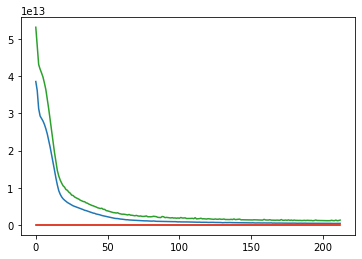

In [19]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_m.history))
plt.show()

In [20]:
submission['value'] = predict

In [21]:
submission.head(2)

,id,value
0,1,105075096.0
1,2,109137680.0


In [22]:
submission.to_csv('submission.csv', index=False)

## 성능 개선 방안

- 데이터의 특징에 유의
    - 이적료에 영향을 미치는 요소 중 나이, 포지션, 유명도는 특히 더 영향을 주기 때문에 가중치를 더 주어야한다.
    
- 회귀문제
    - 회귀문제에는 머신러닝을 대부분 사용한다.